## Assignments for Week-02

In this course, we learnt what's the search problem and what's the machine leanring. In this assignment, we need you do some more practice.

### 1. Re-code the house price machine learning

###### 1. Random Choose Method to get optimal *k* and *b*
###### 2.Supervised Direction to get optimal *k* and *b*
###### 3.Gradient Descent to get optimal *k* and *b*
###### 4. Try different Loss function and learning rate. 

For example, you can change the loss function: $Loss = \frac{1}{n} sum({y_i - \hat{y_i}})^2$ to $Loss = \frac{1}{n} sum(|{y_i - \hat{y_i}}|)$

And you can change the learning rate and observe the performance.

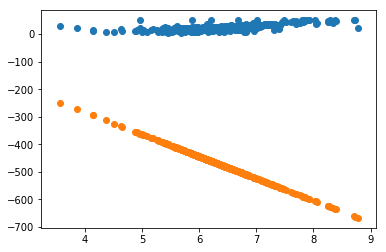

In [8]:
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
import random


#1. Re-code the house price machine learning
data = load_boston()
X, y = data['data'], data['target']

def draw_rm_and_price():
    plt.scatter(X[:, 5], y)
    #plt.show()

def price(rm, k, b):
    '''f(x) = k * x + b'''
    return k * rm + b


X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()

%matplotlib inline
import random
def price(rm, k, b):
    """f(x) = k * x + b"""
    return k * rm + b  
X_rm = X[:, 5]
k = random.randint(-100, 100)
b = random.randint(-100, 100)
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

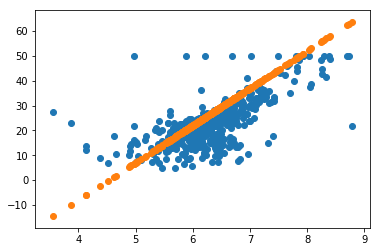

In [3]:
#1. Random Choose Method to get optimal k* and *b

%matplotlib inline
def loss(y, y_hat):
    return sum((y_i - y_hat_i) ** 2 for y_i, y_hat_i in zip(list(y), list(y_hat))) / len(list(y))

def method_1(X_rm):
    trying_times = 1000
    min_loss = float('inf')

    best_k = float('inf')
    best_b = float('inf')


    for i in range(trying_times):
        k = random.random() * 200 - 100
        b = random.random() * 200 - 100
        price_by_random_k_and_b = [price(r, k, b) for r in X_rm]
        current_loss = loss(y, price_by_random_k_and_b)

        if current_loss < min_loss:
            min_loss = current_loss
            best_k, best_b = k, b
            print('time is: {}, best_k: {}, best_b: {}, loss is {}'.format(i, best_k, best_b, min_loss))

    X_rm = X[:5]

    print(best_k, best_b)
    draw_rm_and_price()
    price_by_random_k_and_b = [price(r, best_k, best_b) for r in X_rm]
    plt.scatter(X_rm, price_by_random_k_and_b)

            
    
X_rm = X[:, 5]
k = 15
b = -68
price_by_random_k_and_b = [price(r, k, b) for r in X_rm]

draw_rm_and_price()
plt.scatter(X_rm, price_by_random_k_and_b)

In [4]:
#2.Supervised Direction to get optimal k* and *b¶
trying_times = 2000
min_loss = float('inf')

best_k = random.random() * 200 - 100
best_b = random.random() * 200 - 100

direction = [(+1,-1), (+1,+1), (-1,-1), (-1,+1)]
next_direction = random.choice(direction)
scalar = 0.1
for i in range(trying_times):

    k_direction, b_direction = next_direction
    current_k, current_b = best_k + k_direction * scalar, best_b + k_direction * scalar
    price_by_k_and_b = [price(r, current_k, current_b) for r in X_rm]
    current_loss = loss(y, price_by_k_and_b)

    if current_loss < min_loss:
        min_loss = current_loss
        best_k, best_b = current_k, current_b
        next_direction = next_direction
        print('time is: {}, get bset_k: {}, best_b: {}, and the loss is: {}'.format(i, best_k, best_b, min_loss))
    else:
        next_direction = random.choice(direction)



time is: 0, get bset_k: 21.198749215900854, best_b: -76.12204513945278, and the loss is: 1310.8871633090075
time is: 2, get bset_k: 21.098749215900853, best_b: -76.22204513945277, and the loss is: 1259.8625566882733
time is: 3, get bset_k: 20.99874921590085, best_b: -76.32204513945277, and the loss is: 1209.9091219350123
time is: 4, get bset_k: 20.89874921590085, best_b: -76.42204513945276, and the loss is: 1161.026859049218
time is: 5, get bset_k: 20.79874921590085, best_b: -76.52204513945276, and the loss is: 1113.215768030898
time is: 6, get bset_k: 20.698749215900847, best_b: -76.62204513945275, and the loss is: 1066.475848880046
time is: 7, get bset_k: 20.598749215900845, best_b: -76.72204513945275, and the loss is: 1020.8071015966648
time is: 8, get bset_k: 20.498749215900844, best_b: -76.82204513945274, and the loss is: 976.2095261807534
time is: 9, get bset_k: 20.398749215900843, best_b: -76.92204513945273, and the loss is: 932.6831226323136
time is: 10, get bset_k: 20.29874921

In [7]:
#3.Gradient Descent to get optimal k* and *b

def method_3():
    trying_times = 2000
    min_loss = float('inf')

    ct = 0
    step = 0.2
    k = random.randint(-100, 100)
    b = random.randint(-100 , 100)

    success_count = 0
    for i in range(trying_times):
        delta_k = 0
        delta_b = 0

        for x_, y_ in zip(list(X_rm), list(y)):
            #print(x, y)  求导

            delta_k += (2 * x_ * x_ * k + 2 * b * x_ -2 * x_ * y_)/len(y)
            delta_b += (2 *b + 2 * x_ * k - 2 * y_)/len(y)



        k = k - delta_k/2000
        b = b - delta_b/2000


        price_by_k_and_b = [price(r, k, b) for r in X_rm]
        current_loss = loss(y, price_by_k_and_b)

        if current_loss < min_loss:

            min_loss = current_loss
            #print(delta_k, delta_b)
            if ct % 100 == 0:
                print('time is: {}, best_k: {}, best_b: {}, and the loss is: {}'.format(i,k, b, min_loss))

        ct += 1

method_3()

time is: 0, best_k: -20.999143328406426, best_b: 64.00552424362351, and the loss is: 8680.1333725639
time is: 100, best_k: -20.91295875147605, best_b: 64.56135175967253, and the loss is: 8480.145453624948
time is: 200, best_k: -20.825724339480352, best_b: 65.12408648249826, and the loss is: 8280.157833844429
time is: 300, best_k: -20.737400630036987, best_b: 65.69399159893138, and the loss is: 8080.1705284155405
time is: 400, best_k: -20.647945621093356, best_b: 66.27134742249548, and the loss is: 7880.183553719148
time is: 500, best_k: -20.557314535836465, best_b: 66.85645299422883, and the loss is: 7680.196927450818
time is: 600, best_k: -20.46545955884373, best_b: 67.44962788106905, and the loss is: 7480.210668765551
time is: 700, best_k: -20.372329539052323, best_b: 68.05121420243067, and the loss is: 7280.224798442575
time is: 800, best_k: -20.27786965429732, best_b: 68.66157892137971, and the loss is: 7080.239339074603
time is: 900, best_k: -20.18202103115758, best_b: 69.28111644

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414412237&di=8377c38d7b50c6f8d45b92ccc78dc1e7&imgtype=0&src=http%3A%2F%2Fmmbiz.qpic.cn%2Fmmbiz_jpg%2FlSyiavfm6wPgQDuDYa42IMgSkLOcPJU91RbkMibGy7VHLrhhNVLibTYk1iaLcmXKTdHc4icTDVia59QFXwqpW8cLflaw%2F640%3Fwx_fmt%3Djpeg)

## 2. Answer following questions:


###### 1. Why do we need machine learning methods instead of creating a complicated formula?


Ans:自动化高效；精准

###### 2.  Wha't's the disadvantages of `the 1st Random Choosen` methods in our course? 

Ans:因随机的计算导致耗时长，最后也不一定是最优解

###### 3. Is the `2nd method supervised direction` better than 1st one?  What's the disadvantages of `the 2nd supversied directin` method? 

Ans:有方向性的解法比第一种好；缺点是方向性和步长不变导致求解的速度慢

###### 4. Why do we use `Derivative / Gredient` to fit a target function? 

Ans:快速精准求解

###### 5. In the words 'Gredient Descent', what's the `Gredient` and what's the `Descent`?

Ans:梯度下降；梯度：对一个函数中的各个向量做偏导数，以向量的方式呈现就是梯度；梯度下降：损失函数的最小值；梯度上升：损失函数的最大值

###### 6. What's the advantages of `the 3rd gradient descent method` compared to the previous methods?

Ans:速度快，精准

###### 7. Using the simple words to describe: What's the machine leanring.

Ans:给定条件让机器自动化求解

## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

> Deadline: 2019-July-13

>Submit: Submit the source code and result to github. 



![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562414356407&di=b57814aafd215bb8b8d9d8cd37c573d6&imgtype=0&src=http%3A%2F%2Fcli.clewm.net%2Ffile%2F2015%2F03%2F24%2F174ed60082b8422ac0636cfd3efb9e7f.jpg)

#### Dataflow: 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门



In [9]:
# -*- coding:utf-8 -*-

from bs4 import BeautifulSoup
import requests, re, urllib, time
from collections import defaultdict


def requests_get_all_contents(url):
    requests_get_all = requests.get(url, headers=headers)
    #print(requests_get_all.status_code)
    requests_get_all.encoding = requests_get_all.apparent_encoding
    return requests_get_all

def write_in_text(content, file_name):
    with open(file_name, 'w', encoding='utf-8') as f:
        f.writelines(content)

def merge_new_sites(new_site, all_sites):
    for k in new_site:
        if k in all_sites:
            all_sites[k]['nabours'] += new_site[k]['nabours']
            all_sites[k]['line'] += new_site[k]['line']
        else:
            all_sites.update(new_site)
    return(all_sites)

def  find_string_key_word_tables(table_key_words, soup):
    for i in table_key_words:
        key_word_all_info = soup.find_all(string = re.compile(".*" + i + "$"))
        for r in key_word_all_info:
            if r.find_parents('table'):  # 14号线参考资料里面有个  列车时刻表 的祖节点无table，上面是有正确信息的
                return i
    return False

def not_inclued(list, string):
    for each in list:
        if each in string:
            return False
    return True

def add_one_site_in_one_line(all_sites_in_one_line, remain_list, string):
    if not_inclued(remain_list, string):
        all_sites_in_one_line.append(string.strip('站'))
    else:
        all_sites_in_one_line.append(string)
    return all_sites_in_one_line

def sites_search_shikebiao_shijianbiao(all_sites_in_one_line, line_site_table):
    first_column = line_site_table.find_all('tr', )
    for each in first_column:
        if each.next_element.string == None:
            continue
        if not_inclued(remove_list, each.next_element.string):
            all_sites_in_one_line = add_one_site_in_one_line(all_sites_in_one_line, remain_list, each.next_element.string)
    return all_sites_in_one_line

def sites_search_jianjuxinxi(all_sites_in_one_line, line_site_table):
    first_column = line_site_table.find_all('tr', )
    for each in first_column:
        if each.next_element.string == None:
            continue
        if not_inclued(remove_list, each.next_element.string):
            site = each.next_element.string.split('——')[0]
            all_sites_in_one_line = add_one_site_in_one_line(all_sites_in_one_line, remain_list, site)
    return all_sites_in_one_line

def sites_search_chezhanmingcheng(all_sites_in_one_line, line_site_table):
    first_column = line_site_table.find_all('tr', )
    for each in first_column:
        site = each.find_all(string = re.compile('.*站$'))
        if site == []:
            continue
        else:
            all_sites_in_one_line =add_one_site_in_one_line(all_sites_in_one_line, remain_list, site[0])
    return all_sites_in_one_line

def search_all_sites_in_one_line(k, v, single_line_soup):
    line_site_tables = single_line_soup.find_all(string=re.compile(".*" + v['search_table'] + "$"))
    #print(line_site_tables)
    if v['search_table'] == '车时刻表' or v['search_table'] == '车时间':  #时刻表可能有分段的，另外两种情况没有
        for t in line_site_tables:
            all_sites_in_one_line = []
            if not t.find_parents('table'):  #14号线参考资料里面有个  列车时刻表 祖节点无table
                continue
            line_site_table = t.find_parents('table')[0]
            all_sites_in_one_line = sites_search_shikebiao_shijianbiao(all_sites_in_one_line, line_site_table)
            add_new_site(all_sites_in_one_line, k, v)

    if v['search_table'] == '间距信息统计表':
        all_sites_in_one_line = []
        all_sites_in_one_line = sites_search_jianjuxinxi(all_sites_in_one_line, line_site_tables[0].find_parents('table')[0])
        add_new_site(all_sites_in_one_line, k, v)
    if v['search_table'] == '车站名称':
        all_sites_in_one_line = []
        all_sites_in_one_line = sites_search_chezhanmingcheng(all_sites_in_one_line, line_site_tables[0].find_parents('table')[0])
        add_new_site(all_sites_in_one_line, k, v)

    #print(len(all_sites_in_one_line))
    #print (False if  all_sites_in_one_line == [] else True)
    return (False if  all_sites_in_one_line == [] else True)


def add_new_site(all_sites_in_one_line, line_parameters_k, line_parameters_v ):
    for i in range(len(all_sites_in_one_line)):
        new_site_dict = defaultdict(dict)
        new_site_dict[all_sites_in_one_line[i]]['name'] = all_sites_in_one_line[i]
        new_site_dict[all_sites_in_one_line[i]]['line'] = [line_parameters_k]
        if i == 0 and  line_parameters_v['loop'] == True:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i + 1]] + [all_sites_in_one_line[-1]]
        elif i == 0:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i + 1]]
        elif i == len(all_sites_in_one_line) -1 and  line_parameters_v['loop'] == True:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i - 1]] + [all_sites_in_one_line[0]]
        elif i == len(all_sites_in_one_line) -1:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i - i]]
        else:
            new_site_dict[all_sites_in_one_line[i]]['nabours'] = [all_sites_in_one_line[i + 1]] + [all_sites_in_one_line[i - 1]]
        merge_new_sites(new_site_dict, rail_way_graph)

def init_line_paramaters():
    url_prefix = 'https://baike.baidu.com'
    all_line_list = soup.find_all('a', href=re.compile("^/item/" + urllib.request.quote('北京地铁') + ".*" + "%BA%BF$"),string=re.compile("北京地铁.*"))
    for i in all_line_list:
        if not (i.string in line_paramaters):
            line_paramaters[i.string]['name'] = i.string
            line_paramaters[i.string]['url'] = url_prefix + urllib.request.unquote(i['href'])
            line_paramaters[i.string]['loop'] = False
            line_paramaters[i.string]['search_table'] = False


def remove_duplication(list):
    lis = []
    for i in list:
        if i not in lis:
            lis.append(i)
    return lis

def refresh_rail_way_graph():
    for k, v in rail_way_graph.items():
        v['nabours'] = remove_duplication(v['nabours'])
        v['line'] = remove_duplication(v['line'])

        city_connection[k] = v['nabours']
    return city_connection



def search(start, destination, connection_grpah, sort_candidate):
    pathes = [[start]]

    visitied = set()

    while pathes:  # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]

        if froninter in visitied: continue

        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue  # eliminate loop
            new_path = path + [city]
            pathes.append(new_path)
            if city == destination:
                return new_path
        visitied.add(froninter)
        pathes = sort_candidate(pathes)  # 我们可以加一个排序函数 对我们的搜索策略进行控制
    print(pathes)

def transfer_stations_first(pathes):
    return sorted(pathes, key=len)

def transfer_as_less_as_possible(pathes):
    return sorted(pathes, key=len, reverse=False)





if __name__ == '__main__':
    url = 'https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485?fr=aladdin'
    headers = {
        'user-agent': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.36 SE 2.X MetaSr 1.0',
    }

    requests_get_base_all = requests_get_all_contents(url)
    soup = BeautifulSoup(requests_get_base_all.text, 'html.parser')

    line_paramaters = defaultdict(dict)
    rail_way_graph = defaultdict(dict)
    city_connection = defaultdict(dict)

    init_line_paramaters()
    # line_paramaters = defaultdict(dict)
    # line_paramaters.update({'北京地铁1号线': {'name': '北京地铁1号线', 'url': 'https://baike.baidu.com/item/北京地铁1号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁13号线': {'name': '北京地铁13号线', 'url': 'https://baike.baidu.com/item/北京地铁13号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁八通线': {'name': '北京地铁八通线', 'url': 'https://baike.baidu.com/item/北京地铁八通线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁5号线': {'name': '北京地铁5号线', 'url': 'https://baike.baidu.com/item/北京地铁5号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁8号线': {'name': '北京地铁8号线', 'url': 'https://baike.baidu.com/item/北京地铁8号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁10号线': {'name': '北京地铁10号线', 'url': 'https://baike.baidu.com/item/北京地铁10号线', 'loop': True, 'search_table': '车时刻表'}, '北京地铁机场线': {'name': '北京地铁机场线', 'url': 'https://baike.baidu.com/item/北京地铁机场线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁4号线': {'name': '北京地铁4号线', 'url': 'https://baike.baidu.com/item/北京地铁4号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁15号线': {'name': '北京地铁15号线', 'url': 'https://baike.baidu.com/item/北京地铁15号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁昌平线': {'name': '北京地铁昌平线', 'url': 'https://baike.baidu.com/item/北京地铁昌平线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁大兴线': {'name': '北京地铁大兴线', 'url': 'https://baike.baidu.com/item/北京地铁大兴线', 'loop': False, 'search_table': '间距信息统计表'}, '北京地铁房山线': {'name': '北京地铁房山线', 'url': 'https://baike.baidu.com/item/北京地铁房山线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁亦庄线': {'name': '北京地铁亦庄线', 'url': 'https://baike.baidu.com/item/北京地铁亦庄线', 'loop': False, 'search_table': '车站名称'}, '北京地铁9号线': {'name': '北京地铁9号线', 'url': 'https://baike.baidu.com/item/北京地铁9号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁6号线': {'name': '北京地铁6号线', 'url': 'https://baike.baidu.com/item/北京地铁6号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁14号线': {'name': '北京地铁14号线', 'url': 'https://baike.baidu.com/item/北京地铁14号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁7号线': {'name': '北京地铁7号线', 'url': 'https://baike.baidu.com/item/北京地铁7号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁16号线': {'name': '北京地铁16号线', 'url': 'https://baike.baidu.com/item/北京地铁16号线', 'loop': False, 'search_table': '车时间'}, '北京地铁西郊线': {'name': '北京地铁西郊线', 'url': 'https://baike.baidu.com/item/北京地铁西郊线', 'loop': False, 'search_table': '车站名称'}, '北京地铁S1线': {'name': '北京地铁S1线', 'url': 'https://baike.baidu.com/item/北京地铁S1线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁燕房线': {'name': '北京地铁燕房线', 'url': 'https://baike.baidu.com/item/北京地铁燕房线', 'loop': False, 'search_table': '车站名称'}, '北京地铁2号线': {'name': '北京地铁2号线', 'url': 'https://baike.baidu.com/item/北京地铁2号线', 'loop': True, 'search_table': '间距信息统计表'}})
    #line_paramaters={'北京地铁燕房线': {'name': '北京地铁燕房线', 'url': 'https://baike.baidu.com/item/北京地铁燕房线', 'loop': False, 'search_table': '车站名称'}}

    table_key_words = ['车时刻表', '间距信息统计表', '车时间', '车站名称']
    remove_list = ['时刻表', '时间表', '车站名称', '【注】', '首车时间', '备注', '下行', '上行', '时间', '全程', '终到车站']
    remain_list = ['火车站', '北京站', '北京西站', '北京南站',]



    ct = 0
    for k, v in line_paramaters.items():
        # if ct == 2:
        #    break
        #采用网页爬取的数据
        single_line = BeautifulSoup(requests_get_all_contents(v['url']).text, 'html.parser')

        '''
        # 采用已经下载好的txt文件读取
        #file_name = str(v['name']) + '.txt'
        #write_in_text(requests_get_each_line_all.text, file_name)
        file_name = k + '.txt'  
        single_line = BeautifulSoup(open(file_name, 'r', encoding='utf-8'), 'html.parser')  # 采用已经下载好的txt文件读取
        '''


        if (single_line.find_all(string=re.compile(".*环线地铁")) or single_line.find_all(string=re.compile(".*环形地铁"))):
            v['loop'] = True

        v['search_table'] = find_string_key_word_tables(table_key_words, single_line)
        print(k)
        # print(k, v['search_table'])
        search_all_sites_in_one_line(k, v, single_line)

        # ct += 1
    
    
    refresh_rail_way_graph()
    
    #print(line_paramaters)
    #print(rail_way_graph)
    #print(city_connection)

    simple_connection_info = defaultdict(list)
    simple_connection_info.update(city_connection)


print(search('西单', '中国美术馆', simple_connection_info, sort_candidate=transfer_as_less_as_possible))


北京地铁1号线
北京地铁13号线
北京地铁八通线
北京地铁5号线
北京地铁8号线
北京地铁10号线
北京地铁机场线
北京地铁4号线
北京地铁15号线
北京地铁昌平线
北京地铁大兴线
北京地铁房山线
北京地铁亦庄线
北京地铁9号线
北京地铁6号线
北京地铁14号线
北京地铁7号线
北京地铁16号线
北京地铁西郊线
北京地铁S1线
北京地铁燕房线
北京地铁2号线
['西单', '灵境胡同', '西四', '平安里', '北海北', '南锣鼓巷', '中国美术馆']


## （Optional）Create different policies for transfer system.


以下部门为可选部分，请酌情完成。 并不要求全部同学完成。

As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

In [6]:
# -*- coding:utf-8 -*-

from bs4 import BeautifulSoup
import requests, re, urllib, time
from collections import defaultdict

line_paramaters = {'北京地铁1号线': {'name': '北京地铁1号线', 'url': 'https://baike.baidu.com/item/北京地铁1号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁13号线': {'name': '北京地铁13号线', 'url': 'https://baike.baidu.com/item/北京地铁13号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁八通线': {'name': '北京地铁八通线', 'url': 'https://baike.baidu.com/item/北京地铁八通线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁5号线': {'name': '北京地铁5号线', 'url': 'https://baike.baidu.com/item/北京地铁5号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁8号线': {'name': '北京地铁8号线', 'url': 'https://baike.baidu.com/item/北京地铁8号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁10号线': {'name': '北京地铁10号线', 'url': 'https://baike.baidu.com/item/北京地铁10号线', 'loop': True, 'search_table': '车时刻表'}, '北京地铁机场线': {'name': '北京地铁机场线', 'url': 'https://baike.baidu.com/item/北京地铁机场线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁4号线': {'name': '北京地铁4号线', 'url': 'https://baike.baidu.com/item/北京地铁4号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁15号线': {'name': '北京地铁15号线', 'url': 'https://baike.baidu.com/item/北京地铁15号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁昌平线': {'name': '北京地铁昌平线', 'url': 'https://baike.baidu.com/item/北京地铁昌平线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁大兴线': {'name': '北京地铁大兴线', 'url': 'https://baike.baidu.com/item/北京地铁大兴线', 'loop': False, 'search_table': '间距信息统计表'}, '北京地铁房山线': {'name': '北京地铁房山线', 'url': 'https://baike.baidu.com/item/北京地铁房山线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁亦庄线': {'name': '北京地铁亦庄线', 'url': 'https://baike.baidu.com/item/北京地铁亦庄线', 'loop': False, 'search_table': '车站名称'}, '北京地铁9号线': {'name': '北京地铁9号线', 'url': 'https://baike.baidu.com/item/北京地铁9号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁6号线': {'name': '北京地铁6号线', 'url': 'https://baike.baidu.com/item/北京地铁6号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁14号线': {'name': '北京地铁14号线', 'url': 'https://baike.baidu.com/item/北京地铁14号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁7号线': {'name': '北京地铁7号线', 'url': 'https://baike.baidu.com/item/北京地铁7号线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁16号线': {'name': '北京地铁16号线', 'url': 'https://baike.baidu.com/item/北京地铁16号线', 'loop': False, 'search_table': '车时间'}, '北京地铁西郊线': {'name': '北京地铁西郊线', 'url': 'https://baike.baidu.com/item/北京地铁西郊线', 'loop': False, 'search_table': '车站名称'}, '北京地铁S1线': {'name': '北京地铁S1线', 'url': 'https://baike.baidu.com/item/北京地铁S1线', 'loop': False, 'search_table': '车时刻表'}, '北京地铁燕房线': {'name': '北京地铁燕房线', 'url': 'https://baike.baidu.com/item/北京地铁燕房线', 'loop': False, 'search_table': '车站名称'}, '北京地铁2号线': {'name': '北京地铁2号线', 'url': 'https://baike.baidu.com/item/北京地铁2号线', 'loop': True, 'search_table': '间距信息统计表'}}
rail_way_graph = {'苹果园': {'name': '苹果园', 'line': ['北京地铁1号线', '北京地铁6号线', '北京地铁S1线'], 'nabours': ['古城', '杨庄', '金安桥']}, '古城': {'name': '古城', 'line': ['北京地铁1号线'], 'nabours': ['八角游乐园', '苹果园']}, '八角游乐园': {'name': '八角游乐园', 'line': ['北京地铁1号线'], 'nabours': ['八宝山', '古城']}, '八宝山': {'name': '八宝山', 'line': ['北京地铁1号线'], 'nabours': ['玉泉路', '八角游乐园']}, '玉泉路': {'name': '玉泉路', 'line': ['北京地铁1号线'], 'nabours': ['五棵松', '八宝山']}, '五棵松': {'name': '五棵松', 'line': ['北京地铁1号线'], 'nabours': ['万寿路', '玉泉路']}, '万寿路': {'name': '万寿路', 'line': ['北京地铁1号线'], 'nabours': ['公主坟', '五棵松']}, '公主坟': {'name': '公主坟', 'line': ['北京地铁1号线', '北京地铁10号线'], 'nabours': ['军事博物馆', '万寿路', '西钓鱼台', '莲花桥']}, '军事博物馆': {'name': '军事博物馆', 'line': ['北京地铁1号线', '北京地铁9号线'], 'nabours': ['木樨地', '公主坟', '白堆子', '北京西站']}, '木樨地': {'name': '木樨地', 'line': ['北京地铁1号线'], 'nabours': ['南礼士路', '军事博物馆']}, '南礼士路': {'name': '南礼士路', 'line': ['北京地铁1号线'], 'nabours': ['复兴门', '木樨地']}, '复兴门': {'name': '复兴门', 'line': ['北京地铁1号线', '北京地铁2号线'], 'nabours': ['西单', '南礼士路', '长椿街', '阜成门']}, '西单': {'name': '西单', 'line': ['北京地铁1号线', '北京地铁4号线'], 'nabours': ['天安门西', '复兴门', '宣武门', '灵境胡同']}, '天安门西': {'name': '天安门西', 'line': ['北京地铁1号线'], 'nabours': ['天安门东', '西单']}, '天安门东': {'name': '天安门东', 'line': ['北京地铁1号线'], 'nabours': ['王府井', '天安门西']}, '王府井': {'name': '王府井', 'line': ['北京地铁1号线'], 'nabours': ['东单', '天安门东']}, '东单': {'name': '东单', 'line': ['北京地铁1号线', '北京地铁5号线'], 'nabours': ['建国门', '王府井', '灯市口', '崇文门']}, '建国门': {'name': '建国门', 'line': ['北京地铁1号线', '北京地铁2号线'], 'nabours': ['永安里', '东单', '朝阳门', '北京站']}, '永安里': {'name': '永安里', 'line': ['北京地铁1号线'], 'nabours': ['国贸', '建国门']}, '国贸': {'name': '国贸', 'line': ['北京地铁1号线', '北京地铁10号线'], 'nabours': ['大望路', '永安里', '双井', '金台夕照']}, '大望路': {'name': '大望路', 'line': ['北京地铁1号线', '北京地铁14号线'], 'nabours': ['四惠', '国贸', '金台路', '九龙山']}, '四惠': {'name': '四惠', 'line': ['北京地铁1号线', '北京地铁八通线'], 'nabours': ['四惠东', '大望路']}, '四惠东': {'name': '四惠东', 'line': ['北京地铁1号线', '北京地铁八通线'], 'nabours': ['苹果园', '高碑店', '四惠']}, '西直门': {'name': '西直门', 'line': ['北京地铁13号线', '北京地铁4号线', '北京地铁2号线'], 'nabours': ['明光桥西', '新街口', '动物园', '车公庄', '积水潭']}, '明光桥西': {'name': '明光桥西', 'line': ['北京地铁13号线'], 'nabours': ['大钟寺', '西直门']}, '大钟寺': {'name': '大钟寺', 'line': ['北京地铁13号线'], 'nabours': ['知春路', '明光桥西']}, '知春路': {'name': '知春路', 'line': ['北京地铁13号线', '北京地铁10号线'], 'nabours': ['五道口', '大钟寺', '西土城', '知春里']}, '五道口': {'name': '五道口', 'line': ['北京地铁13号线'], 'nabours': ['清华东路西口', '知春路']}, '清华东路西口': {'name': '清华东路西口', 'line': ['北京地铁13号线', '北京地铁15号线'], 'nabours': ['上地', '五道口', '俸伯']}, '上地': {'name': '上地', 'line': ['北京地铁13号线'], 'nabours': ['清河', '清华东路西口']}, '清河': {'name': '清河', 'line': ['北京地铁13号线'], 'nabours': ['西二旗', '上地']}, '西二旗': {'name': '西二旗', 'line': ['北京地铁13号线', '北京地铁昌平线'], 'nabours': ['龙泽', '清河', '昌平西山口']}, '龙泽': {'name': '龙泽', 'line': ['北京地铁13号线'], 'nabours': ['回龙观', '西二旗']}, '回龙观': {'name': '回龙观', 'line': ['北京地铁13号线'], 'nabours': ['霍营', '龙泽']}, '霍营': {'name': '霍营', 'line': ['北京地铁13号线', '北京地铁8号线'], 'nabours': ['建材城东路', '回龙观', '育新', '回龙观东大街']}, '建材城东路': {'name': '建材城东路', 'line': ['北京地铁13号线'], 'nabours': ['立水桥', '霍营']}, '立水桥': {'name': '立水桥', 'line': ['北京地铁13号线', '北京地铁5号线'], 'nabours': ['北苑', '建材城东路', '天通苑南', '立水桥南']}, '北苑': {'name': '北苑', 'line': ['北京地铁13号线'], 'nabours': ['来广营西', '立水桥']}, '来广营西': {'name': '来广营西', 'line': ['北京地铁13号线'], 'nabours': ['望京西', '北苑']}, '望京西': {'name': '望京西', 'line': ['北京地铁13号线', '北京地铁15号线'], 'nabours': ['望和桥', '来广营西', '关庄', '望京']}, '望和桥': {'name': '望和桥', 'line': ['北京地铁13号线'], 'nabours': ['芍药居', '望京西']}, '芍药居': {'name': '芍药居', 'line': ['北京地铁13号线', '北京地铁10号线'], 'nabours': ['光熙门', '望和桥', '太阳宫', '惠新西街南口']}, '光熙门': {'name': '光熙门', 'line': ['北京地铁13号线'], 'nabours': ['柳芳', '芍药居']}, '柳芳': {'name': '柳芳', 'line': ['北京地铁13号线'], 'nabours': ['东直门', '光熙门']}, '东直门': {'name': '东直门', 'line': ['北京地铁13号线', '北京地铁机场线', '北京地铁2号线'], 'nabours': ['西直门', '三元桥', '雍和宫', '东四十条']}, '高碑店': {'name': '高碑店', 'line': ['北京地铁八通线'], 'nabours': ['传媒大学', '四惠东']}, '传媒大学': {'name': '传媒大学', 'line': ['北京地铁八通线'], 'nabours': ['双桥', '高碑店']}, '双桥': {'name': '双桥', 'line': ['北京地铁八通线'], 'nabours': ['管庄', '传媒大学']}, '管庄': {'name': '管庄', 'line': ['北京地铁八通线'], 'nabours': ['八里桥', '双桥']}, '八里桥': {'name': '八里桥', 'line': ['北京地铁八通线'], 'nabours': ['通州北苑', '管庄']}, '通州北苑': {'name': '通州北苑', 'line': ['北京地铁八通线'], 'nabours': ['果园', '八里桥']}, '果园': {'name': '果园', 'line': ['北京地铁八通线'], 'nabours': ['九棵树', '通州北苑']}, '九棵树': {'name': '九棵树', 'line': ['北京地铁八通线'], 'nabours': ['梨园', '果园']}, '梨园': {'name': '梨园', 'line': ['北京地铁八通线'], 'nabours': ['临河里', '九棵树']}, '临河里': {'name': '临河里', 'line': ['北京地铁八通线'], 'nabours': ['土桥', '梨园']}, '土桥': {'name': '土桥', 'line': ['北京地铁八通线'], 'nabours': ['四惠']}, '宋家庄': {'name': '宋家庄', 'line': ['北京地铁5号线', '北京地铁10号线', '北京地铁亦庄线'], 'nabours': ['刘家窑', '石榴庄', '成寿寺', '肖村']}, '刘家窑': {'name': '刘家窑', 'line': ['北京地铁5号线'], 'nabours': ['蒲黄榆', '宋家庄']}, '蒲黄榆': {'name': '蒲黄榆', 'line': ['北京地铁5号线', '北京地铁14号线'], 'nabours': ['天坛东门', '刘家窑', '方庄', '景泰']}, '天坛东门': {'name': '天坛东门', 'line': ['北京地铁5号线'], 'nabours': ['磁器口', '蒲黄榆']}, '磁器口': {'name': '磁器口', 'line': ['北京地铁5号线', '北京地铁7号线'], 'nabours': ['崇文门', '天坛东门', '广渠门内', '桥湾']}, '崇文门': {'name': '崇文门', 'line': ['北京地铁5号线', '北京地铁2号线'], 'nabours': ['东单', '磁器口', '北京站', '前门']}, '灯市口': {'name': '灯市口', 'line': ['北京地铁5号线'], 'nabours': ['东四', '东单']}, '东四': {'name': '东四', 'line': ['北京地铁5号线', '北京地铁6号线'], 'nabours': ['张自忠路', '灯市口', '朝阳门', '南锣鼓巷']}, '张自忠路': {'name': '张自忠路', 'line': ['北京地铁5号线'], 'nabours': ['北新桥', '东四']}, '北新桥': {'name': '北新桥', 'line': ['北京地铁5号线'], 'nabours': ['雍和宫', '张自忠路']}, '雍和宫': {'name': '雍和宫', 'line': ['北京地铁5号线', '北京地铁2号线'], 'nabours': ['和平里北街', '北新桥', '安定门', '东直门']}, '和平里北街': {'name': '和平里北街', 'line': ['北京地铁5号线'], 'nabours': ['和平西桥', '雍和宫']}, '和平西桥': {'name': '和平西桥', 'line': ['北京地铁5号线'], 'nabours': ['惠新西街南口', '和平里北街']}, '惠新西街南口': {'name': '惠新西街南口', 'line': ['北京地铁5号线', '北京地铁10号线'], 'nabours': ['惠新西街北口', '和平西桥', '芍药居', '安贞门']}, '惠新西街北口': {'name': '惠新西街北口', 'line': ['北京地铁5号线'], 'nabours': ['大屯路东', '惠新西街南口']}, '大屯路东': {'name': '大屯路东', 'line': ['北京地铁5号线', '北京地铁15号线'], 'nabours': ['北苑路北', '惠新西街北口', '安立路', '关庄']}, '北苑路北': {'name': '北苑路北', 'line': ['北京地铁5号线'], 'nabours': ['立水桥南', '大屯路东']}, '立水桥南': {'name': '立水桥南', 'line': ['北京地铁5号线'], 'nabours': ['立水桥', '北苑路北']}, '天通苑南': {'name': '天通苑南', 'line': ['北京地铁5号线'], 'nabours': ['天通苑', '立水桥']}, '天通苑': {'name': '天通苑', 'line': ['北京地铁5号线'], 'nabours': ['天通苑北', '天通苑南']}, '天通苑北': {'name': '天通苑北', 'line': ['北京地铁5号线'], 'nabours': ['宋家庄']}, '朱辛庄': {'name': '朱辛庄', 'line': ['北京地铁8号线', '北京地铁昌平线'], 'nabours': ['育知路', '生命科学园', '巩华城']}, '育知路': {'name': '育知路', 'line': ['北京地铁8号线'], 'nabours': ['平西府', '朱辛庄']}, '平西府': {'name': '平西府', 'line': ['北京地铁8号线'], 'nabours': ['回龙观东大街', '育知路']}, '回龙观东大街': {'name': '回龙观东大街', 'line': ['北京地铁8号线'], 'nabours': ['霍营', '平西府']}, '育新': {'name': '育新', 'line': ['北京地铁8号线'], 'nabours': ['西小口', '霍营']}, '西小口': {'name': '西小口', 'line': ['北京地铁8号线'], 'nabours': ['永泰庄', '育新']}, '永泰庄': {'name': '永泰庄', 'line': ['北京地铁8号线'], 'nabours': ['林萃桥', '西小口']}, '林萃桥': {'name': '林萃桥', 'line': ['北京地铁8号线'], 'nabours': ['森林公园南门', '永泰庄']}, '森林公园南门': {'name': '森林公园南门', 'line': ['北京地铁8号线'], 'nabours': ['奥林匹克公园', '林萃桥']}, '奥林匹克公园': {'name': '奥林匹克公园', 'line': ['北京地铁8号线', '北京地铁15号线'], 'nabours': ['奥体中心', '森林公园南门', '北沙滩', '安立路']}, '奥体中心': {'name': '奥体中心', 'line': ['北京地铁8号线'], 'nabours': ['北土城', '奥林匹克公园']}, '北土城': {'name': '北土城', 'line': ['北京地铁8号线', '北京地铁10号线'], 'nabours': ['安华桥', '奥体中心', '安贞门', '健德门']}, '安华桥': {'name': '安华桥', 'line': ['北京地铁8号线'], 'nabours': ['安德里北街', '北土城']}, '安德里北街': {'name': '安德里北街', 'line': ['北京地铁8号线'], 'nabours': ['鼓楼大街', '安华桥']}, '鼓楼大街': {'name': '鼓楼大街', 'line': ['北京地铁8号线', '北京地铁2号线'], 'nabours': ['什刹海', '安德里北街', '积水潭', '安定门']}, '什刹海': {'name': '什刹海', 'line': ['北京地铁8号线'], 'nabours': ['南锣鼓巷', '鼓楼大街']}, '南锣鼓巷': {'name': '南锣鼓巷', 'line': ['北京地铁8号线', '北京地铁6号线'], 'nabours': ['中国美术馆', '什刹海', '东四', '北海北']}, '中国美术馆': {'name': '中国美术馆', 'line': ['北京地铁8号线'], 'nabours': ['朱辛庄']}, '瀛海': {'name': '瀛海', 'line': ['北京地铁8号线'], 'nabours': ['德茂']}, '德茂': {'name': '德茂', 'line': ['北京地铁8号线'], 'nabours': ['五福堂', '瀛海']}, '五福堂': {'name': '五福堂', 'line': ['北京地铁8号线'], 'nabours': ['火箭万源', '德茂']}, '火箭万源': {'name': '火箭万源', 'line': ['北京地铁8号线'], 'nabours': ['东高地', '五福堂']}, '东高地': {'name': '东高地', 'line': ['北京地铁8号线'], 'nabours': ['和义', '火箭万源']}, '和义': {'name': '和义', 'line': ['北京地铁8号线'], 'nabours': ['大红门南', '东高地']}, '大红门南': {'name': '大红门南', 'line': ['北京地铁8号线'], 'nabours': ['大红门', '和义']}, '大红门': {'name': '大红门', 'line': ['北京地铁8号线', '北京地铁10号线'], 'nabours': ['海户屯', '大红门南', '角门东', '石榴庄']}, '海户屯': {'name': '海户屯', 'line': ['北京地铁8号线'], 'nabours': ['木樨园', '大红门']}, '木樨园': {'name': '木樨园', 'line': ['北京地铁8号线'], 'nabours': ['永定门外', '海户屯']}, '永定门外': {'name': '永定门外', 'line': ['北京地铁8号线', '北京地铁14号线'], 'nabours': ['天桥', '木樨园', '景泰', '北京南站']}, '天桥': {'name': '天桥', 'line': ['北京地铁8号线'], 'nabours': ['珠市口', '永定门外']}, '珠市口': {'name': '珠市口', 'line': ['北京地铁8号线', '北京地铁7号线'], 'nabours': ['瀛海', '桥湾', '虎坊桥']}, '巴沟': {'name': '巴沟', 'line': ['北京地铁10号线', '北京地铁西郊线'], 'nabours': ['苏州街', '火器营', '颐和园西门']}, '苏州街': {'name': '苏州街', 'line': ['北京地铁10号线'], 'nabours': ['海淀黄庄', '巴沟']}, '海淀黄庄': {'name': '海淀黄庄', 'line': ['北京地铁10号线', '北京地铁4号线'], 'nabours': ['知春里', '苏州街', '人民大学', '中关村']}, '知春里': {'name': '知春里', 'line': ['北京地铁10号线'], 'nabours': ['知春路', '海淀黄庄']}, '西土城': {'name': '西土城', 'line': ['北京地铁10号线'], 'nabours': ['牡丹园', '知春路']}, '牡丹园': {'name': '牡丹园', 'line': ['北京地铁10号线'], 'nabours': ['健德门', '西土城']}, '健德门': {'name': '健德门', 'line': ['北京地铁10号线'], 'nabours': ['北土城', '牡丹园']}, '安贞门': {'name': '安贞门', 'line': ['北京地铁10号线'], 'nabours': ['惠新西街南口', '北土城']}, '太阳宫': {'name': '太阳宫', 'line': ['北京地铁10号线'], 'nabours': ['三元桥', '芍药居']}, '三元桥': {'name': '三元桥', 'line': ['北京地铁10号线', '北京地铁机场线'], 'nabours': ['亮马桥', '太阳宫', '3号航站楼', '东直门']}, '亮马桥': {'name': '亮马桥', 'line': ['北京地铁10号线'], 'nabours': ['农业展览馆', '三元桥']}, '农业展览馆': {'name': '农业展览馆', 'line': ['北京地铁10号线'], 'nabours': ['团结湖', '亮马桥']}, '团结湖': {'name': '团结湖', 'line': ['北京地铁10号线'], 'nabours': ['呼家楼', '农业展览馆']}, '呼家楼': {'name': '呼家楼', 'line': ['北京地铁10号线', '北京地铁6号线'], 'nabours': ['金台夕照', '团结湖', '金台路', '东大桥']}, '金台夕照': {'name': '金台夕照', 'line': ['北京地铁10号线'], 'nabours': ['国贸', '呼家楼']}, '双井': {'name': '双井', 'line': ['北京地铁10号线', '北京地铁7号线'], 'nabours': ['劲松', '国贸', '九龙山', '广渠门外']}, '劲松': {'name': '劲松', 'line': ['北京地铁10号线'], 'nabours': ['潘家园', '双井']}, '潘家园': {'name': '潘家园', 'line': ['北京地铁10号线'], 'nabours': ['十里河', '劲松']}, '十里河': {'name': '十里河', 'line': ['北京地铁10号线', '北京地铁14号线'], 'nabours': ['分钟寺', '潘家园', '北工大西门', '方庄']}, '分钟寺': {'name': '分钟寺', 'line': ['北京地铁10号线'], 'nabours': ['成寿寺', '十里河']}, '成寿寺': {'name': '成寿寺', 'line': ['北京地铁10号线'], 'nabours': ['宋家庄', '分钟寺']}, '石榴庄': {'name': '石榴庄', 'line': ['北京地铁10号线'], 'nabours': ['大红门', '宋家庄']}, '角门东': {'name': '角门东', 'line': ['北京地铁10号线'], 'nabours': ['角门西', '大红门']}, '角门西': {'name': '角门西', 'line': ['北京地铁10号线', '北京地铁4号线'], 'nabours': ['草桥', '角门东', '公益西桥', '马家堡']}, '草桥': {'name': '草桥', 'line': ['北京地铁10号线'], 'nabours': ['纪家庙', '角门西']}, '纪家庙': {'name': '纪家庙', 'line': ['北京地铁10号线'], 'nabours': ['首经贸', '草桥']}, '首经贸': {'name': '首经贸', 'line': ['北京地铁10号线'], 'nabours': ['丰台', '纪家庙']}, '丰台': {'name': '丰台', 'line': ['北京地铁10号线'], 'nabours': ['泥洼', '首经贸']}, '泥洼': {'name': '泥洼', 'line': ['北京地铁10号线'], 'nabours': ['西局', '丰台']}, '西局': {'name': '西局', 'line': ['北京地铁10号线', '北京地铁14号线'], 'nabours': ['六里桥', '泥洼', '张郭庄']}, '六里桥': {'name': '六里桥', 'line': ['北京地铁10号线', '北京地铁9号线'], 'nabours': ['莲花桥', '西局', '六里桥东', '七里庄']}, '莲花桥': {'name': '莲花桥', 'line': ['北京地铁10号线'], 'nabours': ['公主坟', '六里桥']}, '西钓鱼台': {'name': '西钓鱼台', 'line': ['北京地铁10号线'], 'nabours': ['慈寿寺', '公主坟']}, '慈寿寺': {'name': '慈寿寺', 'line': ['北京地铁10号线', '北京地铁6号线'], 'nabours': ['车道沟', '西钓鱼台', '花园桥', '海淀五路居']}, '车道沟': {'name': '车道沟', 'line': ['北京地铁10号线'], 'nabours': ['长春桥', '慈寿寺']}, '长春桥': {'name': '长春桥', 'line': ['北京地铁10号线'], 'nabours': ['火器营', '车道沟']}, '火器营': {'name': '火器营', 'line': ['北京地铁10号线'], 'nabours': ['长春桥', '巴沟']}, '3号航站楼': {'name': '3号航站楼', 'line': ['北京地铁机场线'], 'nabours': ['2号航站楼', '三元桥']}, '2号航站楼': {'name': '2号航站楼', 'line': ['北京地铁机场线'], 'nabours': ['东直门']}, '安河桥北': {'name': '安河桥北', 'line': ['北京地铁4号线'], 'nabours': ['北宫门']}, '北宫门': {'name': '北宫门', 'line': ['北京地铁4号线'], 'nabours': ['西苑', '安河桥北']}, '西苑': {'name': '西苑', 'line': ['北京地铁4号线', '北京地铁16号线'], 'nabours': ['圆明园', '北宫门', '农大南路']}, '圆明园': {'name': '圆明园', 'line': ['北京地铁4号线'], 'nabours': ['北京大学东门', '西苑']}, '北京大学东门': {'name': '北京大学东门', 'line': ['北京地铁4号线'], 'nabours': ['中关村', '圆明园']}, '中关村': {'name': '中关村', 'line': ['北京地铁4号线'], 'nabours': ['海淀黄庄', '北京大学东门']}, '人民大学': {'name': '人民大学', 'line': ['北京地铁4号线'], 'nabours': ['魏公村', '海淀黄庄']}, '魏公村': {'name': '魏公村', 'line': ['北京地铁4号线'], 'nabours': ['国家图书馆', '人民大学']}, '国家图书馆': {'name': '国家图书馆', 'line': ['北京地铁4号线', '北京地铁9号线'], 'nabours': ['动物园', '魏公村', '郭公庄']}, '动物园': {'name': '动物园', 'line': ['北京地铁4号线'], 'nabours': ['西直门', '国家图书馆']}, '新街口': {'name': '新街口', 'line': ['北京地铁4号线'], 'nabours': ['平安里', '西直门']}, '平安里': {'name': '平安里', 'line': ['北京地铁4号线', '北京地铁6号线'], 'nabours': ['西四', '新街口', '北海北', '车公庄']}, '西四': {'name': '西四', 'line': ['北京地铁4号线'], 'nabours': ['灵境胡同', '平安里']}, '灵境胡同': {'name': '灵境胡同', 'line': ['北京地铁4号线'], 'nabours': ['西单', '西四']}, '宣武门': {'name': '宣武门', 'line': ['北京地铁4号线', '北京地铁2号线'], 'nabours': ['菜市口', '西单', '和平门', '长椿街']}, '菜市口': {'name': '菜市口', 'line': ['北京地铁4号线', '北京地铁7号线'], 'nabours': ['陶然亭', '宣武门', '虎坊桥', '广安门内']}, '陶然亭': {'name': '陶然亭', 'line': ['北京地铁4号线'], 'nabours': ['北京南站', '菜市口']}, '北京南站': {'name': '北京南站', 'line': ['北京地铁4号线', '北京地铁14号线'], 'nabours': ['马家堡', '陶然亭', '永定门外']}, '马家堡': {'name': '马家堡', 'line': ['北京地铁4号线'], 'nabours': ['角门西', '北京南站']}, '公益西桥': {'name': '公益西桥', 'line': ['北京地铁4号线', '北京地铁大兴线'], 'nabours': ['安河桥北', '新宫']}, '俸伯': {'name': '俸伯', 'line': ['北京地铁15号线'], 'nabours': ['顺义']}, '顺义': {'name': '顺义', 'line': ['北京地铁15号线'], 'nabours': ['石门', '俸伯']}, '石门': {'name': '石门', 'line': ['北京地铁15号线'], 'nabours': ['南法信', '顺义']}, '南法信': {'name': '南法信', 'line': ['北京地铁15号线'], 'nabours': ['后沙峪', '石门']}, '后沙峪': {'name': '后沙峪', 'line': ['北京地铁15号线'], 'nabours': ['花梨坎', '南法信']}, '花梨坎': {'name': '花梨坎', 'line': ['北京地铁15号线'], 'nabours': ['国展', '后沙峪']}, '国展': {'name': '国展', 'line': ['北京地铁15号线'], 'nabours': ['孙河', '花梨坎']}, '孙河': {'name': '孙河', 'line': ['北京地铁15号线'], 'nabours': ['马泉营', '国展']}, '马泉营': {'name': '马泉营', 'line': ['北京地铁15号线'], 'nabours': ['崔各庄', '孙河']}, '崔各庄': {'name': '崔各庄', 'line': ['北京地铁15号线'], 'nabours': ['望京东', '马泉营']}, '望京东': {'name': '望京东', 'line': ['北京地铁15号线'], 'nabours': ['望京', '崔各庄']}, '望京': {'name': '望京', 'line': ['北京地铁15号线', '北京地铁14号线'], 'nabours': ['望京西', '望京东', '东湖渠', '阜通']}, '关庄': {'name': '关庄', 'line': ['北京地铁15号线'], 'nabours': ['大屯路东', '望京西']}, '安立路': {'name': '安立路', 'line': ['北京地铁15号线'], 'nabours': ['奥林匹克公园', '大屯路东']}, '北沙滩': {'name': '北沙滩', 'line': ['北京地铁15号线'], 'nabours': ['六道口', '奥林匹克公园']}, '六道口': {'name': '六道口', 'line': ['北京地铁15号线'], 'nabours': ['清华东路西口', '北沙滩']}, '昌平西山口': {'name': '昌平西山口', 'line': ['北京地铁昌平线'], 'nabours': ['十三陵景区']}, '十三陵景区': {'name': '十三陵景区', 'line': ['北京地铁昌平线'], 'nabours': ['昌平', '昌平西山口']}, '昌平': {'name': '昌平', 'line': ['北京地铁昌平线'], 'nabours': ['昌平东关', '十三陵景区']}, '昌平东关': {'name': '昌平东关', 'line': ['北京地铁昌平线'], 'nabours': ['北邵洼', '昌平']}, '北邵洼': {'name': '北邵洼', 'line': ['北京地铁昌平线'], 'nabours': ['南邵', '昌平东关']}, '南邵': {'name': '南邵', 'line': ['北京地铁昌平线'], 'nabours': ['沙河高教园', '北邵洼']}, '沙河高教园': {'name': '沙河高教园', 'line': ['北京地铁昌平线'], 'nabours': ['沙河', '南邵']}, '沙河': {'name': '沙河', 'line': ['北京地铁昌平线'], 'nabours': ['巩华城', '沙河高教园']}, '巩华城': {'name': '巩华城', 'line': ['北京地铁昌平线'], 'nabours': ['朱辛庄', '沙河']}, '生命科学园': {'name': '生命科学园', 'line': ['北京地铁昌平线'], 'nabours': ['西二旗', '朱辛庄']}, '新宫': {'name': '新宫', 'line': ['北京地铁大兴线'], 'nabours': ['西红门', '公益西桥']}, '西红门': {'name': '西红门', 'line': ['北京地铁大兴线'], 'nabours': ['高米店北', '新宫']}, '高米店北': {'name': '高米店北', 'line': ['北京地铁大兴线'], 'nabours': ['高米店南', '西红门']}, '高米店南': {'name': '高米店南', 'line': ['北京地铁大兴线'], 'nabours': ['枣园', '高米店北']}, '枣园': {'name': '枣园', 'line': ['北京地铁大兴线'], 'nabours': ['清源路', '高米店南']}, '清源路': {'name': '清源路', 'line': ['北京地铁大兴线'], 'nabours': ['黄村西大街', '枣园']}, '黄村西大街': {'name': '黄村西大街', 'line': ['北京地铁大兴线'], 'nabours': ['黄村火车站', '清源路']}, '黄村火车站': {'name': '黄村火车站', 'line': ['北京地铁大兴线'], 'nabours': ['义和庄', '黄村西大街']}, '义和庄': {'name': '义和庄', 'line': ['北京地铁大兴线'], 'nabours': ['生物医药基地', '黄村火车站']}, '生物医药基地': {'name': '生物医药基地', 'line': ['北京地铁大兴线'], 'nabours': ['公益西桥']}, '郭公庄': {'name': '郭公庄', 'line': ['北京地铁房山线', '北京地铁9号线'], 'nabours': ['大葆台', '丰台科技园']}, '大葆台': {'name': '大葆台', 'line': ['北京地铁房山线'], 'nabours': ['稻田', '郭公庄']}, '稻田': {'name': '稻田', 'line': ['北京地铁房山线'], 'nabours': ['长阳', '大葆台']}, '长阳': {'name': '长阳', 'line': ['北京地铁房山线'], 'nabours': ['篱笆房', '稻田']}, '篱笆房': {'name': '篱笆房', 'line': ['北京地铁房山线'], 'nabours': ['广阳城', '长阳']}, '广阳城': {'name': '广阳城', 'line': ['北京地铁房山线'], 'nabours': ['良乡大学城北', '篱笆房']}, '良乡大学城北': {'name': '良乡大学城北', 'line': ['北京地铁房山线'], 'nabours': ['良乡大学城', '广阳城']}, '良乡大学城': {'name': '良乡大学城', 'line': ['北京地铁房山线'], 'nabours': ['良乡大学城西', '良乡大学城北']}, '良乡大学城西': {'name': '良乡大学城西', 'line': ['北京地铁房山线'], 'nabours': ['良乡南关', '良乡大学城']}, '良乡南关': {'name': '良乡南关', 'line': ['北京地铁房山线'], 'nabours': ['苏庄', '良乡大学城西']}, '苏庄': {'name': '苏庄', 'line': ['北京地铁房山线'], 'nabours': ['阎村东', '良乡南关']}, '阎村东': {'name': '阎村东', 'line': ['北京地铁房山线', '北京地铁燕房线'], 'nabours': ['郭公庄', '紫草坞']}, '肖村': {'name': '肖村', 'line': ['北京地铁亦庄线'], 'nabours': ['小红门', '宋家庄']}, '小红门': {'name': '小红门', 'line': ['北京地铁亦庄线'], 'nabours': ['旧宫', '肖村']}, '旧宫': {'name': '旧宫', 'line': ['北京地铁亦庄线'], 'nabours': ['亦庄桥', '小红门']}, '亦庄桥': {'name': '亦庄桥', 'line': ['北京地铁亦庄线'], 'nabours': ['亦庄文化园', '旧宫']}, '亦庄文化园': {'name': '亦庄文化园', 'line': ['北京地铁亦庄线'], 'nabours': ['万源街', '亦庄桥']}, '万源街': {'name': '万源街', 'line': ['北京地铁亦庄线'], 'nabours': ['荣京东街', '亦庄文化园']}, '荣京东街': {'name': '荣京东街', 'line': ['北京地铁亦庄线'], 'nabours': ['荣昌东街', '万源街']}, '荣昌东街': {'name': '荣昌东街', 'line': ['北京地铁亦庄线'], 'nabours': ['同济南路', '荣京东街']}, '同济南路': {'name': '同济南路', 'line': ['北京地铁亦庄线'], 'nabours': ['经海路', '荣昌东街']}, '经海路': {'name': '经海路', 'line': ['北京地铁亦庄线'], 'nabours': ['次渠南', '同济南路']}, '次渠南': {'name': '次渠南', 'line': ['北京地铁亦庄线'], 'nabours': ['次渠', '经海路']}, '次渠': {'name': '次渠', 'line': ['北京地铁亦庄线'], 'nabours': ['亦庄火车站', '次渠南']}, '亦庄火车站': {'name': '亦庄火车站', 'line': ['北京地铁亦庄线'], 'nabours': ['宋家庄']}, '丰台科技园': {'name': '丰台科技园', 'line': ['北京地铁9号线'], 'nabours': ['科怡路', '郭公庄']}, '科怡路': {'name': '科怡路', 'line': ['北京地铁9号线'], 'nabours': ['丰台南路', '丰台科技园']}, '丰台南路': {'name': '丰台南路', 'line': ['北京地铁9号线'], 'nabours': ['丰台东大街', '科怡路']}, '丰台东大街': {'name': '丰台东大街', 'line': ['北京地铁9号线'], 'nabours': ['七里庄', '丰台南路']}, '七里庄': {'name': '七里庄', 'line': ['北京地铁9号线', '北京地铁14号线'], 'nabours': ['六里桥', '丰台东大街', '西局', '大井']}, '六里桥东': {'name': '六里桥东', 'line': ['北京地铁9号线'], 'nabours': ['北京西站', '六里桥']}, '北京西站': {'name': '北京西站', 'line': ['北京地铁9号线', '北京地铁7号线'], 'nabours': ['军事博物馆', '六里桥东', '湾子']}, '白堆子': {'name': '白堆子', 'line': ['北京地铁9号线'], 'nabours': ['白石桥南', '军事博物馆']}, '白石桥南': {'name': '白石桥南', 'line': ['北京地铁9号线', '北京地铁6号线'], 'nabours': ['国家图书馆', '白堆子', '车公庄西', '花园桥']}, '金安桥': {'name': '金安桥', 'line': ['北京地铁6号线', '北京地铁S1线'], 'nabours': ['苹果园', '四道桥']}, '杨庄': {'name': '杨庄', 'line': ['北京地铁6号线'], 'nabours': ['西黄村', '苹果园']}, '西黄村': {'name': '西黄村', 'line': ['北京地铁6号线'], 'nabours': ['廖公庄', '杨庄']}, '廖公庄': {'name': '廖公庄', 'line': ['北京地铁6号线'], 'nabours': ['田村', '西黄村']}, '田村': {'name': '田村', 'line': ['北京地铁6号线'], 'nabours': ['海淀五路居', '廖公庄']}, '海淀五路居': {'name': '海淀五路居', 'line': ['北京地铁6号线'], 'nabours': ['慈寿寺', '田村']}, '花园桥': {'name': '花园桥', 'line': ['北京地铁6号线'], 'nabours': ['白石桥南', '慈寿寺']}, '车公庄西': {'name': '车公庄西', 'line': ['北京地铁6号线'], 'nabours': ['车公庄', '白石桥南']}, '车公庄': {'name': '车公庄', 'line': ['北京地铁6号线', '北京地铁2号线'], 'nabours': ['平安里', '车公庄西', '阜成门', '西直门']}, '北海北': {'name': '北海北', 'line': ['北京地铁6号线'], 'nabours': ['南锣鼓巷', '平安里']}, '朝阳门': {'name': '朝阳门', 'line': ['北京地铁6号线', '北京地铁2号线'], 'nabours': ['东大桥', '东四', '东四十条', '建国门']}, '东大桥': {'name': '东大桥', 'line': ['北京地铁6号线'], 'nabours': ['呼家楼', '朝阳门']}, '金台路': {'name': '金台路', 'line': ['北京地铁6号线', '北京地铁14号线'], 'nabours': ['十里堡', '呼家楼', '朝阳公园', '大望路']}, '十里堡': {'name': '十里堡', 'line': ['北京地铁6号线'], 'nabours': ['青年路', '金台路']}, '青年路': {'name': '青年路', 'line': ['北京地铁6号线'], 'nabours': ['褡裢坡', '十里堡']}, '褡裢坡': {'name': '褡裢坡', 'line': ['北京地铁6号线'], 'nabours': ['黄渠', '青年路']}, '黄渠': {'name': '黄渠', 'line': ['北京地铁6号线'], 'nabours': ['常营', '褡裢坡']}, '常营': {'name': '常营', 'line': ['北京地铁6号线'], 'nabours': ['草房', '黄渠']}, '草房': {'name': '草房', 'line': ['北京地铁6号线'], 'nabours': ['物资学院路', '常营']}, '物资学院路': {'name': '物资学院路', 'line': ['北京地铁6号线'], 'nabours': ['通州北关', '草房']}, '通州北关': {'name': '通州北关', 'line': ['北京地铁6号线'], 'nabours': ['通运门', '物资学院路']}, '通运门': {'name': '通运门', 'line': ['北京地铁6号线'], 'nabours': ['北运河西', '通州北关']}, '北运河西': {'name': '北运河西', 'line': ['北京地铁6号线'], 'nabours': ['北运河东', '通运门']}, '北运河东': {'name': '北运河东', 'line': ['北京地铁6号线'], 'nabours': ['郝家府', '北运河西']}, '郝家府': {'name': '郝家府', 'line': ['北京地铁6号线'], 'nabours': ['东夏园', '北运河东']}, '东夏园': {'name': '东夏园', 'line': ['北京地铁6号线'], 'nabours': ['潞城', '郝家府']}, '潞城': {'name': '潞城', 'line': ['北京地铁6号线'], 'nabours': ['金安桥']}, '张郭庄': {'name': '张郭庄', 'line': ['北京地铁14号线'], 'nabours': ['园博园']}, '园博园': {'name': '园博园', 'line': ['北京地铁14号线'], 'nabours': ['大瓦窑', '张郭庄']}, '大瓦窑': {'name': '大瓦窑', 'line': ['北京地铁14号线'], 'nabours': ['郭庄子', '园博园']}, '郭庄子': {'name': '郭庄子', 'line': ['北京地铁14号线'], 'nabours': ['大井', '大瓦窑']}, '大井': {'name': '大井', 'line': ['北京地铁14号线'], 'nabours': ['七里庄', '郭庄子']}, '景泰': {'name': '景泰', 'line': ['北京地铁14号线'], 'nabours': ['蒲黄榆', '永定门外']}, '方庄': {'name': '方庄', 'line': ['北京地铁14号线'], 'nabours': ['十里河', '蒲黄榆']}, '北工大西门': {'name': '北工大西门', 'line': ['北京地铁14号线'], 'nabours': ['九龙山', '十里河']}, '九龙山': {'name': '九龙山', 'line': ['北京地铁14号线', '北京地铁7号线'], 'nabours': ['大望路', '北工大西门', '大郊亭', '双井']}, '朝阳公园': {'name': '朝阳公园', 'line': ['北京地铁14号线'], 'nabours': ['枣营', '金台路']}, '枣营': {'name': '枣营', 'line': ['北京地铁14号线'], 'nabours': ['东风北桥', '朝阳公园']}, '东风北桥': {'name': '东风北桥', 'line': ['北京地铁14号线'], 'nabours': ['将台', '枣营']}, '将台': {'name': '将台', 'line': ['北京地铁14号线'], 'nabours': ['望京南', '东风北桥']}, '望京南': {'name': '望京南', 'line': ['北京地铁14号线'], 'nabours': ['阜通', '将台']}, '阜通': {'name': '阜通', 'line': ['北京地铁14号线'], 'nabours': ['望京', '望京南']}, '东湖渠': {'name': '东湖渠', 'line': ['北京地铁14号线'], 'nabours': ['来广营', '望京']}, '来广营': {'name': '来广营', 'line': ['北京地铁14号线'], 'nabours': ['善各庄', '东湖渠']}, '善各庄': {'name': '善各庄', 'line': ['北京地铁14号线'], 'nabours': ['北京南站']}, '湾子': {'name': '湾子', 'line': ['北京地铁7号线'], 'nabours': ['达官营', '北京西站']}, '达官营': {'name': '达官营', 'line': ['北京地铁7号线'], 'nabours': ['广安门内', '湾子']}, '广安门内': {'name': '广安门内', 'line': ['北京地铁7号线'], 'nabours': ['菜市口', '达官营']}, '虎坊桥': {'name': '虎坊桥', 'line': ['北京地铁7号线'], 'nabours': ['珠市口', '菜市口']}, '桥湾': {'name': '桥湾', 'line': ['北京地铁7号线'], 'nabours': ['磁器口', '珠市口']}, '广渠门内': {'name': '广渠门内', 'line': ['北京地铁7号线'], 'nabours': ['广渠门外', '磁器口']}, '广渠门外': {'name': '广渠门外', 'line': ['北京地铁7号线'], 'nabours': ['双井', '广渠门内']}, '大郊亭': {'name': '大郊亭', 'line': ['北京地铁7号线'], 'nabours': ['百子湾', '九龙山']}, '百子湾': {'name': '百子湾', 'line': ['北京地铁7号线'], 'nabours': ['化工', '大郊亭']}, '化工': {'name': '化工', 'line': ['北京地铁7号线'], 'nabours': ['南楼梓庄', '百子湾']}, '南楼梓庄': {'name': '南楼梓庄', 'line': ['北京地铁7号线'], 'nabours': ['欢乐谷景区', '化工']}, '欢乐谷景区': {'name': '欢乐谷景区', 'line': ['北京地铁7号线'], 'nabours': ['垡头', '南楼梓庄']}, '垡头': {'name': '垡头', 'line': ['北京地铁7号线'], 'nabours': ['双合', '欢乐谷景区']}, '双合': {'name': '双合', 'line': ['北京地铁7号线'], 'nabours': ['焦化厂', '垡头']}, '焦化厂': {'name': '焦化厂', 'line': ['北京地铁7号线'], 'nabours': ['北京西站']}, '农大南路': {'name': '农大南路', 'line': ['北京地铁16号线'], 'nabours': ['马连洼', '西苑']}, '马连洼': {'name': '马连洼', 'line': ['北京地铁16号线'], 'nabours': ['西北旺', '农大南路']}, '西北旺': {'name': '西北旺', 'line': ['北京地铁16号线'], 'nabours': ['永丰南', '马连洼']}, '永丰南': {'name': '永丰南', 'line': ['北京地铁16号线'], 'nabours': ['永丰', '西北旺']}, '永丰': {'name': '永丰', 'line': ['北京地铁16号线'], 'nabours': ['屯佃', '永丰南']}, '屯佃': {'name': '屯佃', 'line': ['北京地铁16号线'], 'nabours': ['稻香湖路', '永丰']}, '稻香湖路': {'name': '稻香湖路', 'line': ['北京地铁16号线'], 'nabours': ['温阳路', '屯佃']}, '温阳路': {'name': '温阳路', 'line': ['北京地铁16号线'], 'nabours': ['北安河', '稻香湖路']}, '北安河': {'name': '北安河', 'line': ['北京地铁16号线'], 'nabours': ['西苑']}, '颐和园西门': {'name': '颐和园西门', 'line': ['北京地铁西郊线'], 'nabours': ['茶棚', '巴沟']}, '茶棚': {'name': '茶棚', 'line': ['北京地铁西郊线'], 'nabours': ['万安', '颐和园西门']}, '万安': {'name': '万安', 'line': ['北京地铁西郊线'], 'nabours': ['植物园', '茶棚']}, '植物园': {'name': '植物园', 'line': ['北京地铁西郊线'], 'nabours': ['香山', '万安']}, '香山': {'name': '香山', 'line': ['北京地铁西郊线'], 'nabours': ['巴沟']}, '四道桥': {'name': '四道桥', 'line': ['北京地铁S1线'], 'nabours': ['桥户营', '金安桥']}, '桥户营': {'name': '桥户营', 'line': ['北京地铁S1线'], 'nabours': ['上岸', '四道桥']}, '上岸': {'name': '上岸', 'line': ['北京地铁S1线'], 'nabours': ['栗园庄', '桥户营']}, '栗园庄': {'name': '栗园庄', 'line': ['北京地铁S1线'], 'nabours': ['小园', '上岸']}, '小园': {'name': '小园', 'line': ['北京地铁S1线'], 'nabours': ['石厂', '栗园庄']}, '石厂': {'name': '石厂', 'line': ['北京地铁S1线'], 'nabours': ['苹果园']}, '紫草坞': {'name': '紫草坞', 'line': ['北京地铁燕房线'], 'nabours': ['阎村', '阎村东']}, '阎村': {'name': '阎村', 'line': ['北京地铁燕房线'], 'nabours': ['星城', '紫草坞']}, '星城': {'name': '星城', 'line': ['北京地铁燕房线'], 'nabours': ['大石河东', '阎村']}, '大石河东': {'name': '大石河东', 'line': ['北京地铁燕房线'], 'nabours': ['马各庄', '星城']}, '马各庄': {'name': '马各庄', 'line': ['北京地铁燕房线'], 'nabours': ['饶乐府', '大石河东']}, '饶乐府': {'name': '饶乐府', 'line': ['北京地铁燕房线'], 'nabours': ['房山城关', '马各庄']}, '房山城关': {'name': '房山城关', 'line': ['北京地铁燕房线'], 'nabours': ['燕山', '饶乐府']}, '燕山': {'name': '燕山', 'line': ['北京地铁燕房线'], 'nabours': ['老城区', '房山城关']}, '老城区': {'name': '老城区', 'line': ['北京地铁燕房线'], 'nabours': ['顾册', '燕山']}, '顾册': {'name': '顾册', 'line': ['北京地铁燕房线'], 'nabours': ['周口店镇', '老城区']}, '周口店镇': {'name': '周口店镇', 'line': ['北京地铁燕房线'], 'nabours': ['阎村东']}, '阜成门': {'name': '阜成门', 'line': ['北京地铁2号线'], 'nabours': ['复兴门', '车公庄']}, '长椿街': {'name': '长椿街', 'line': ['北京地铁2号线'], 'nabours': ['宣武门', '复兴门']}, '和平门': {'name': '和平门', 'line': ['北京地铁2号线'], 'nabours': ['前门', '宣武门']}, '前门': {'name': '前门', 'line': ['北京地铁2号线'], 'nabours': ['崇文门', '和平门']}, '北京站': {'name': '北京站', 'line': ['北京地铁2号线'], 'nabours': ['建国门', '崇文门']}, '东四十条': {'name': '东四十条', 'line': ['北京地铁2号线'], 'nabours': ['东直门', '朝阳门']}, '安定门': {'name': '安定门', 'line': ['北京地铁2号线'], 'nabours': ['鼓楼大街', '雍和宫']}, '积水潭': {'name': '积水潭', 'line': ['北京地铁2号线'], 'nabours': ['鼓楼大街', '西直门']}}
station_connection = {'苹果园': ['古城', '杨庄', '金安桥'], '古城': ['八角游乐园', '苹果园'], '八角游乐园': ['八宝山', '古城'], '八宝山': ['玉泉路', '八角游乐园'], '玉泉路': ['五棵松', '八宝山'], '五棵松': ['万寿路', '玉泉路'], '万寿路': ['公主坟', '五棵松'], '公主坟': ['军事博物馆', '万寿路', '西钓鱼台', '莲花桥'], '军事博物馆': ['木樨地', '公主坟', '白堆子', '北京西站'], '木樨地': ['南礼士路', '军事博物馆'], '南礼士路': ['复兴门', '木樨地'], '复兴门': ['西单', '南礼士路', '长椿街', '阜成门'], '西单': ['天安门西', '复兴门', '宣武门', '灵境胡同'], '天安门西': ['天安门东', '西单'], '天安门东': ['王府井', '天安门西'], '王府井': ['东单', '天安门东'], '东单': ['建国门', '王府井', '灯市口', '崇文门'], '建国门': ['永安里', '东单', '朝阳门', '北京站'], '永安里': ['国贸', '建国门'], '国贸': ['大望路', '永安里', '双井', '金台夕照'], '大望路': ['四惠', '国贸', '金台路', '九龙山'], '四惠': ['四惠东', '大望路'], '四惠东': ['苹果园', '高碑店', '四惠'], '西直门': ['明光桥西', '新街口', '动物园', '车公庄', '积水潭'], '明光桥西': ['大钟寺', '西直门'], '大钟寺': ['知春路', '明光桥西'], '知春路': ['五道口', '大钟寺', '西土城', '知春里'], '五道口': ['清华东路西口', '知春路'], '清华东路西口': ['上地', '五道口', '俸伯'], '上地': ['清河', '清华东路西口'], '清河': ['西二旗', '上地'], '西二旗': ['龙泽', '清河', '昌平西山口'], '龙泽': ['回龙观', '西二旗'], '回龙观': ['霍营', '龙泽'], '霍营': ['建材城东路', '回龙观', '育新', '回龙观东大街'], '建材城东路': ['立水桥', '霍营'], '立水桥': ['北苑', '建材城东路', '天通苑南', '立水桥南'], '北苑': ['来广营西', '立水桥'], '来广营西': ['望京西', '北苑'], '望京西': ['望和桥', '来广营西', '关庄', '望京'], '望和桥': ['芍药居', '望京西'], '芍药居': ['光熙门', '望和桥', '太阳宫', '惠新西街南口'], '光熙门': ['柳芳', '芍药居'], '柳芳': ['东直门', '光熙门'], '东直门': ['西直门', '三元桥', '雍和宫', '东四十条'], '高碑店': ['传媒大学', '四惠东'], '传媒大学': ['双桥', '高碑店'], '双桥': ['管庄', '传媒大学'], '管庄': ['八里桥', '双桥'], '八里桥': ['通州北苑', '管庄'], '通州北苑': ['果园', '八里桥'], '果园': ['九棵树', '通州北苑'], '九棵树': ['梨园', '果园'], '梨园': ['临河里', '九棵树'], '临河里': ['土桥', '梨园'], '土桥': ['四惠'], '宋家庄': ['刘家窑', '石榴庄', '成寿寺', '肖村'], '刘家窑': ['蒲黄榆', '宋家庄'], '蒲黄榆': ['天坛东门', '刘家窑', '方庄', '景泰'], '天坛东门': ['磁器口', '蒲黄榆'], '磁器口': ['崇文门', '天坛东门', '广渠门内', '桥湾'], '崇文门': ['东单', '磁器口', '北京站', '前门'], '灯市口': ['东四', '东单'], '东四': ['张自忠路', '灯市口', '朝阳门', '南锣鼓巷'], '张自忠路': ['北新桥', '东四'], '北新桥': ['雍和宫', '张自忠路'], '雍和宫': ['和平里北街', '北新桥', '安定门', '东直门'], '和平里北街': ['和平西桥', '雍和宫'], '和平西桥': ['惠新西街南口', '和平里北街'], '惠新西街南口': ['惠新西街北口', '和平西桥', '芍药居', '安贞门'], '惠新西街北口': ['大屯路东', '惠新西街南口'], '大屯路东': ['北苑路北', '惠新西街北口', '安立路', '关庄'], '北苑路北': ['立水桥南', '大屯路东'], '立水桥南': ['立水桥', '北苑路北'], '天通苑南': ['天通苑', '立水桥'], '天通苑': ['天通苑北', '天通苑南'], '天通苑北': ['宋家庄'], '朱辛庄': ['育知路', '生命科学园', '巩华城'], '育知路': ['平西府', '朱辛庄'], '平西府': ['回龙观东大街', '育知路'], '回龙观东大街': ['霍营', '平西府'], '育新': ['西小口', '霍营'], '西小口': ['永泰庄', '育新'], '永泰庄': ['林萃桥', '西小口'], '林萃桥': ['森林公园南门', '永泰庄'], '森林公园南门': ['奥林匹克公园', '林萃桥'], '奥林匹克公园': ['奥体中心', '森林公园南门', '北沙滩', '安立路'], '奥体中心': ['北土城', '奥林匹克公园'], '北土城': ['安华桥', '奥体中心', '安贞门', '健德门'], '安华桥': ['安德里北街', '北土城'], '安德里北街': ['鼓楼大街', '安华桥'], '鼓楼大街': ['什刹海', '安德里北街', '积水潭', '安定门'], '什刹海': ['南锣鼓巷', '鼓楼大街'], '南锣鼓巷': ['中国美术馆', '什刹海', '东四', '北海北'], '中国美术馆': ['朱辛庄'], '瀛海': ['德茂'], '德茂': ['五福堂', '瀛海'], '五福堂': ['火箭万源', '德茂'], '火箭万源': ['东高地', '五福堂'], '东高地': ['和义', '火箭万源'], '和义': ['大红门南', '东高地'], '大红门南': ['大红门', '和义'], '大红门': ['海户屯', '大红门南', '角门东', '石榴庄'], '海户屯': ['木樨园', '大红门'], '木樨园': ['永定门外', '海户屯'], '永定门外': ['天桥', '木樨园', '景泰', '北京南站'], '天桥': ['珠市口', '永定门外'], '珠市口': ['瀛海', '桥湾', '虎坊桥'], '巴沟': ['苏州街', '火器营', '颐和园西门'], '苏州街': ['海淀黄庄', '巴沟'], '海淀黄庄': ['知春里', '苏州街', '人民大学', '中关村'], '知春里': ['知春路', '海淀黄庄'], '西土城': ['牡丹园', '知春路'], '牡丹园': ['健德门', '西土城'], '健德门': ['北土城', '牡丹园'], '安贞门': ['惠新西街南口', '北土城'], '太阳宫': ['三元桥', '芍药居'], '三元桥': ['亮马桥', '太阳宫', '3号航站楼', '东直门'], '亮马桥': ['农业展览馆', '三元桥'], '农业展览馆': ['团结湖', '亮马桥'], '团结湖': ['呼家楼', '农业展览馆'], '呼家楼': ['金台夕照', '团结湖', '金台路', '东大桥'], '金台夕照': ['国贸', '呼家楼'], '双井': ['劲松', '国贸', '九龙山', '广渠门外'], '劲松': ['潘家园', '双井'], '潘家园': ['十里河', '劲松'], '十里河': ['分钟寺', '潘家园', '北工大西门', '方庄'], '分钟寺': ['成寿寺', '十里河'], '成寿寺': ['宋家庄', '分钟寺'], '石榴庄': ['大红门', '宋家庄'], '角门东': ['角门西', '大红门'], '角门西': ['草桥', '角门东', '公益西桥', '马家堡'], '草桥': ['纪家庙', '角门西'], '纪家庙': ['首经贸', '草桥'], '首经贸': ['丰台', '纪家庙'], '丰台': ['泥洼', '首经贸'], '泥洼': ['西局', '丰台'], '西局': ['六里桥', '泥洼', '张郭庄'], '六里桥': ['莲花桥', '西局', '六里桥东', '七里庄'], '莲花桥': ['公主坟', '六里桥'], '西钓鱼台': ['慈寿寺', '公主坟'], '慈寿寺': ['车道沟', '西钓鱼台', '花园桥', '海淀五路居'], '车道沟': ['长春桥', '慈寿寺'], '长春桥': ['火器营', '车道沟'], '火器营': ['长春桥', '巴沟'], '3号航站楼': ['2号航站楼', '三元桥'], '2号航站楼': ['东直门'], '安河桥北': ['北宫门'], '北宫门': ['西苑', '安河桥北'], '西苑': ['圆明园', '北宫门', '农大南路'], '圆明园': ['北京大学东门', '西苑'], '北京大学东门': ['中关村', '圆明园'], '中关村': ['海淀黄庄', '北京大学东门'], '人民大学': ['魏公村', '海淀黄庄'], '魏公村': ['国家图书馆', '人民大学'], '国家图书馆': ['动物园', '魏公村', '郭公庄'], '动物园': ['西直门', '国家图书馆'], '新街口': ['平安里', '西直门'], '平安里': ['西四', '新街口', '北海北', '车公庄'], '西四': ['灵境胡同', '平安里'], '灵境胡同': ['西单', '西四'], '宣武门': ['菜市口', '西单', '和平门', '长椿街'], '菜市口': ['陶然亭', '宣武门', '虎坊桥', '广安门内'], '陶然亭': ['北京南站', '菜市口'], '北京南站': ['马家堡', '陶然亭', '永定门外'], '马家堡': ['角门西', '北京南站'], '公益西桥': ['安河桥北', '新宫'], '俸伯': ['顺义'], '顺义': ['石门', '俸伯'], '石门': ['南法信', '顺义'], '南法信': ['后沙峪', '石门'], '后沙峪': ['花梨坎', '南法信'], '花梨坎': ['国展', '后沙峪'], '国展': ['孙河', '花梨坎'], '孙河': ['马泉营', '国展'], '马泉营': ['崔各庄', '孙河'], '崔各庄': ['望京东', '马泉营'], '望京东': ['望京', '崔各庄'], '望京': ['望京西', '望京东', '东湖渠', '阜通'], '关庄': ['大屯路东', '望京西'], '安立路': ['奥林匹克公园', '大屯路东'], '北沙滩': ['六道口', '奥林匹克公园'], '六道口': ['清华东路西口', '北沙滩'], '昌平西山口': ['十三陵景区'], '十三陵景区': ['昌平', '昌平西山口'], '昌平': ['昌平东关', '十三陵景区'], '昌平东关': ['北邵洼', '昌平'], '北邵洼': ['南邵', '昌平东关'], '南邵': ['沙河高教园', '北邵洼'], '沙河高教园': ['沙河', '南邵'], '沙河': ['巩华城', '沙河高教园'], '巩华城': ['朱辛庄', '沙河'], '生命科学园': ['西二旗', '朱辛庄'], '新宫': ['西红门', '公益西桥'], '西红门': ['高米店北', '新宫'], '高米店北': ['高米店南', '西红门'], '高米店南': ['枣园', '高米店北'], '枣园': ['清源路', '高米店南'], '清源路': ['黄村西大街', '枣园'], '黄村西大街': ['黄村火车站', '清源路'], '黄村火车站': ['义和庄', '黄村西大街'], '义和庄': ['生物医药基地', '黄村火车站'], '生物医药基地': ['公益西桥'], '郭公庄': ['大葆台', '丰台科技园'], '大葆台': ['稻田', '郭公庄'], '稻田': ['长阳', '大葆台'], '长阳': ['篱笆房', '稻田'], '篱笆房': ['广阳城', '长阳'], '广阳城': ['良乡大学城北', '篱笆房'], '良乡大学城北': ['良乡大学城', '广阳城'], '良乡大学城': ['良乡大学城西', '良乡大学城北'], '良乡大学城西': ['良乡南关', '良乡大学城'], '良乡南关': ['苏庄', '良乡大学城西'], '苏庄': ['阎村东', '良乡南关'], '阎村东': ['郭公庄', '紫草坞'], '肖村': ['小红门', '宋家庄'], '小红门': ['旧宫', '肖村'], '旧宫': ['亦庄桥', '小红门'], '亦庄桥': ['亦庄文化园', '旧宫'], '亦庄文化园': ['万源街', '亦庄桥'], '万源街': ['荣京东街', '亦庄文化园'], '荣京东街': ['荣昌东街', '万源街'], '荣昌东街': ['同济南路', '荣京东街'], '同济南路': ['经海路', '荣昌东街'], '经海路': ['次渠南', '同济南路'], '次渠南': ['次渠', '经海路'], '次渠': ['亦庄火车站', '次渠南'], '亦庄火车站': ['宋家庄'], '丰台科技园': ['科怡路', '郭公庄'], '科怡路': ['丰台南路', '丰台科技园'], '丰台南路': ['丰台东大街', '科怡路'], '丰台东大街': ['七里庄', '丰台南路'], '七里庄': ['六里桥', '丰台东大街', '西局', '大井'], '六里桥东': ['北京西站', '六里桥'], '北京西站': ['军事博物馆', '六里桥东', '湾子'], '白堆子': ['白石桥南', '军事博物馆'], '白石桥南': ['国家图书馆', '白堆子', '车公庄西', '花园桥'], '金安桥': ['苹果园', '四道桥'], '杨庄': ['西黄村', '苹果园'], '西黄村': ['廖公庄', '杨庄'], '廖公庄': ['田村', '西黄村'], '田村': ['海淀五路居', '廖公庄'], '海淀五路居': ['慈寿寺', '田村'], '花园桥': ['白石桥南', '慈寿寺'], '车公庄西': ['车公庄', '白石桥南'], '车公庄': ['平安里', '车公庄西', '阜成门', '西直门'], '北海北': ['南锣鼓巷', '平安里'], '朝阳门': ['东大桥', '东四', '东四十条', '建国门'], '东大桥': ['呼家楼', '朝阳门'], '金台路': ['十里堡', '呼家楼', '朝阳公园', '大望路'], '十里堡': ['青年路', '金台路'], '青年路': ['褡裢坡', '十里堡'], '褡裢坡': ['黄渠', '青年路'], '黄渠': ['常营', '褡裢坡'], '常营': ['草房', '黄渠'], '草房': ['物资学院路', '常营'], '物资学院路': ['通州北关', '草房'], '通州北关': ['通运门', '物资学院路'], '通运门': ['北运河西', '通州北关'], '北运河西': ['北运河东', '通运门'], '北运河东': ['郝家府', '北运河西'], '郝家府': ['东夏园', '北运河东'], '东夏园': ['潞城', '郝家府'], '潞城': ['金安桥'], '张郭庄': ['园博园'], '园博园': ['大瓦窑', '张郭庄'], '大瓦窑': ['郭庄子', '园博园'], '郭庄子': ['大井', '大瓦窑'], '大井': ['七里庄', '郭庄子'], '景泰': ['蒲黄榆', '永定门外'], '方庄': ['十里河', '蒲黄榆'], '北工大西门': ['九龙山', '十里河'], '九龙山': ['大望路', '北工大西门', '大郊亭', '双井'], '朝阳公园': ['枣营', '金台路'], '枣营': ['东风北桥', '朝阳公园'], '东风北桥': ['将台', '枣营'], '将台': ['望京南', '东风北桥'], '望京南': ['阜通', '将台'], '阜通': ['望京', '望京南'], '东湖渠': ['来广营', '望京'], '来广营': ['善各庄', '东湖渠'], '善各庄': ['北京南站'], '湾子': ['达官营', '北京西站'], '达官营': ['广安门内', '湾子'], '广安门内': ['菜市口', '达官营'], '虎坊桥': ['珠市口', '菜市口'], '桥湾': ['磁器口', '珠市口'], '广渠门内': ['广渠门外', '磁器口'], '广渠门外': ['双井', '广渠门内'], '大郊亭': ['百子湾', '九龙山'], '百子湾': ['化工', '大郊亭'], '化工': ['南楼梓庄', '百子湾'], '南楼梓庄': ['欢乐谷景区', '化工'], '欢乐谷景区': ['垡头', '南楼梓庄'], '垡头': ['双合', '欢乐谷景区'], '双合': ['焦化厂', '垡头'], '焦化厂': ['北京西站'], '农大南路': ['马连洼', '西苑'], '马连洼': ['西北旺', '农大南路'], '西北旺': ['永丰南', '马连洼'], '永丰南': ['永丰', '西北旺'], '永丰': ['屯佃', '永丰南'], '屯佃': ['稻香湖路', '永丰'], '稻香湖路': ['温阳路', '屯佃'], '温阳路': ['北安河', '稻香湖路'], '北安河': ['西苑'], '颐和园西门': ['茶棚', '巴沟'], '茶棚': ['万安', '颐和园西门'], '万安': ['植物园', '茶棚'], '植物园': ['香山', '万安'], '香山': ['巴沟'], '四道桥': ['桥户营', '金安桥'], '桥户营': ['上岸', '四道桥'], '上岸': ['栗园庄', '桥户营'], '栗园庄': ['小园', '上岸'], '小园': ['石厂', '栗园庄'], '石厂': ['苹果园'], '紫草坞': ['阎村', '阎村东'], '阎村': ['星城', '紫草坞'], '星城': ['大石河东', '阎村'], '大石河东': ['马各庄', '星城'], '马各庄': ['饶乐府', '大石河东'], '饶乐府': ['房山城关', '马各庄'], '房山城关': ['燕山', '饶乐府'], '燕山': ['老城区', '房山城关'], '老城区': ['顾册', '燕山'], '顾册': ['周口店镇', '老城区'], '周口店镇': ['阎村东'], '阜成门': ['复兴门', '车公庄'], '长椿街': ['宣武门', '复兴门'], '和平门': ['前门', '宣武门'], '前门': ['崇文门', '和平门'], '北京站': ['建国门', '崇文门'], '东四十条': ['东直门', '朝阳门'], '安定门': ['鼓楼大街', '雍和宫'], '积水潭': ['鼓楼大街', '西直门']}


def search(start, destination, connection_grpah, sort_candidate):
    find_ways = []
    pathes = [[start]]
    visitied = set()

    while pathes:  # if we find existing pathes
        path = pathes.pop(0)
        froninter = path[-1]
        # print('path {}'.format(path))
        if froninter in visitied: continue

        successors = connection_grpah[froninter]
        for city in successors:
            if city in path: continue
            new_path = path + [city]        #广度优先，其实默认了按照乘坐站点数目最少来排序的

            if city == destination:
                find_ways.append(new_path)  # 把可能的路线结果放到字典find_ways中
                continue
            pathes.append(new_path)

        visitied.add(froninter)
        # pathes = sort_candidate(pathes)  # 线路排序放外面

    print('all different ways with min stations that cannot repeat:')
    for f in find_ways:
        print(f)

    return (sort_candidate(find_ways)[0])


def least_stations_first(ways):   #策略1  乘坐站点最少
    return sorted(ways, key=len)


def transfer_least_first(ways):   #策略2  换乘站点最少  还没有想好
    '''
    for each_path in ways:
        all_transfer_lines = []
        transfer_count = 1

        for i, each_station in enumerate(each_path):
            if i == 0 or i == (len(each_path) - 1):
                transfer_count += 0
                continue
            elif len(rail_way_graph[each_station]['line']) > 1:
                transfer_count += 1

        each_path.append(transfer_count)
        # print(each_path)
    sorted(ways, key=lambda x: x[-1])
    print(ways[0])
    return sorted([path[:-1] for path in ways])
    '''
    pass

def inter_change(ways):  #策略3  指定中转站
    pass


if __name__ == '__main__':
    print('---least_stations_first---\n The best way is: {}'.format(
        search('北京南站', '珠市口', station_connection, sort_candidate=least_stations_first)))





all different ways with min stations that cannot repeat:
['北京南站', '永定门外', '天桥', '珠市口']
['北京南站', '陶然亭', '菜市口', '虎坊桥', '珠市口']
['北京南站', '永定门外', '景泰', '蒲黄榆', '天坛东门', '磁器口', '桥湾', '珠市口']
---least_stations_first---
 The best way is: ['北京南站', '永定门外', '天桥', '珠市口']


##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因


恭喜，完成本次课程，你对常用的人工智能方法以及有一定的了解了。基于规则的，基于概率模型的，基于搜索的，基于机器学习的。 可以说，我们现在通常见到的方法都能够归属到这几类方法中。 这就是**人工智能**，并没有很难是吧？ 继续加油！

![](https://timgsa.baidu.com/timg?image&quality=80&size=b9999_10000&sec=1562415163815&di=4b29a2a863a8285212033760f288ed7a&imgtype=0&src=http%3A%2F%2F5b0988e595225.cdn.sohucs.com%2Fimages%2F20180710%2F8704194a1d7f46a383ddc29d40c9bca5.jpeg)